In [2]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Tarea 1 - Ecuaciones de movimiento de péndulo simple</h1>
<h2 style="text-align:center"> ACUS125: Aislamiento y Análisis de Vibraciones </h2>
<h3 style="text-align:center"> Primer semestre 2023 </h3>

<p style="text-align:center"> <b>Profesor </b></p>
<p style="text-align:center">Dr. Víctor Poblete R. <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>

<p style="text-align:center"> <b>Ayudante </b></p>

<p style="text-align:center">Rafael Peñailillo H.<br>
<a href="mailto:vpoblete@uach.cl">rafael.penailillo@alumnos.uach.cl</a><br>


### 1. Plotear (graficar) la solución lineal y no lineal de un péndulo simple

Recordar que las ecuaciones para cada caso son las siguientes:

**Ecuación no lineal**
$$
\begin{align*}
\ddot{\theta}\,+\,\frac{g}{L}\,\text{sen}(\theta)\,=\,0
\end{align*}
$$

**Ecuación lineal**

$$
\begin{align*}
\ddot{\theta}\,+\,\frac{g}{L}\,\theta\,=\,0
\end{align*}
$$

Con las siguientes condiciones iniciales $\theta_{0}$ y $\dot{\theta_{0}}$:

+ > > L = 1 m; g = 9.81 m/$s^2$; $\theta_{0} = \pi /3 = [60°]$; $\dot{\theta_{0}}=0$ (rad/s)

Y recordando la **solución lineal**:

$$
\begin{align*}
\theta (t) = \theta_{0}\cdot cos(\omega_{0}t) + \frac{\dot{\theta_{0}}}{\omega_{0}}\cdot sen(\omega_{0}t)
\end{align*}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Solución lineal del péndulo simple
g = 9.81 # m/s/s
L = 1# m
w = np.sqrt(g/L) # rad/s
t = np.linspace(0, 4*np.pi/w) # 2 periodos de movimiento
theta0 = np.pi/3
dtheta0 = 0
theta = theta0*np.cos(w*t) + dtheta0/w*np.sin(w*t)


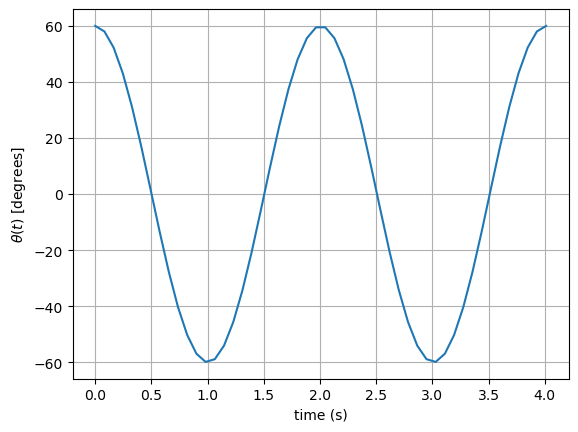

In [3]:
##ploteo##
plt.plot(t, theta*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')
plt.grid()

In [4]:
# Solución no lineal del péndulo simple
def pendulum(t, x):
    dx = np.zeros(len(x))
    dx[0] = x[1]
    dx[1] = -g/L*np.sin(x[0])
    return dx

sol = solve_ivp(pendulum, [0, t.max()], [theta0, 0], t_eval=t)

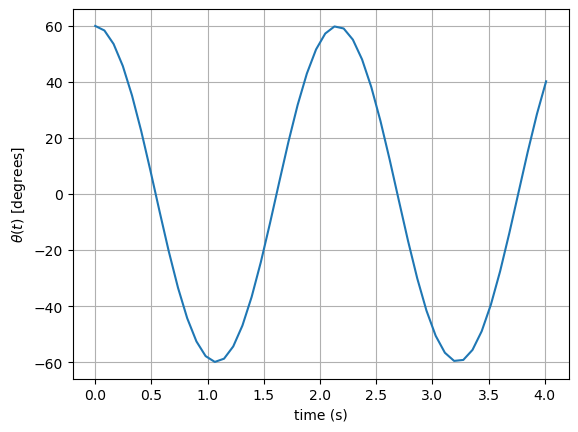

In [5]:
# ploteo 
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')
plt.grid()

### 2. Comparar gráficamente y comentar los resultados obtenidos para cada solución

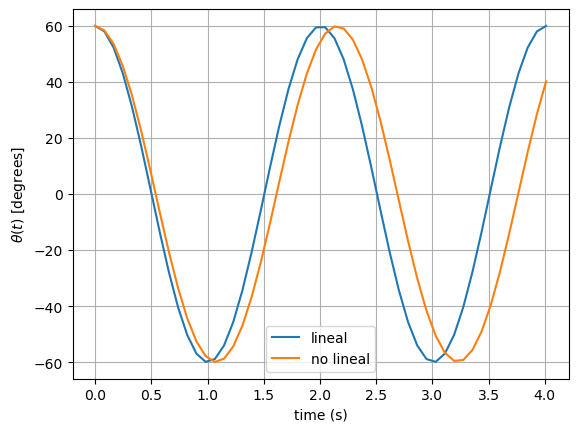

In [6]:
plt.plot(t, theta*180/np.pi, label= "lineal")
plt.plot(sol.t, sol.y[0]*180/np.pi, label= "no lineal")
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')
plt.legend()
plt.grid()


### 3. Cuantificar el error entre estos dos resultados utilizando RMSE (raíz del error cuadrático medio)

In [7]:

# Calcular el RMSE
diff = sol.y[0] - theta
diff_sq = diff**2
mse = np.mean(diff_sq)
rmse = np.sqrt(mse)

print(f"El RMSE entre las dos soluciones es: {rmse}")

El RMSE entre las dos soluciones es: 0.3681382867420888


In [9]:
rmse_grados = rmse*180/np.pi
rmse_grados

21.0927701074986

### 4. Construir un arreglo (vector) entre 0 y 90 grados para el desplazamiento angular tomando al menos 30 valores entre estos (ver `numpy.linspace()`).

In [10]:
theta_arr = np.linspace(0, np.pi/2, num=60)
# Imprimir el arreglo
print(theta_arr)

[0.         0.02662367 0.05324733 0.079871   0.10649467 0.13311833
 0.159742   0.18636567 0.21298933 0.239613   0.26623667 0.29286033
 0.319484   0.34610767 0.37273133 0.399355   0.42597866 0.45260233
 0.479226   0.50584966 0.53247333 0.559097   0.58572066 0.61234433
 0.638968   0.66559166 0.69221533 0.718839   0.74546266 0.77208633
 0.79871    0.82533366 0.85195733 0.878581   0.90520466 0.93182833
 0.958452   0.98507566 1.01169933 1.038323   1.06494666 1.09157033
 1.118194   1.14481766 1.17144133 1.198065   1.22468866 1.25131233
 1.27793599 1.30455966 1.33118333 1.35780699 1.38443066 1.41105433
 1.43767799 1.46430166 1.49092533 1.51754899 1.54417266 1.57079633]


### 5. Para cada valor de $\theta$, cuantificar el error y realizar un gráfico en que se muestre el error vs. $\theta$ grados.

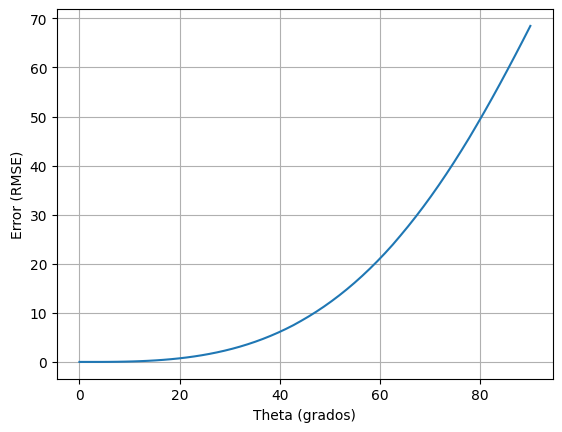

El valor de theta que da el menor error es: 0.0 grados


In [11]:
# Calcular el error para cada valor de theta
error_arr = np.zeros_like(theta_arr)
for i, theta_i in enumerate(theta_arr):
    # Solución lineal
    theta_lin = theta_i*np.cos(w*t) + dtheta0/w*np.sin(w*t)
    
    # Solución no lineal
    sol = solve_ivp(pendulum, [0, t.max()], [theta_i, 0], t_eval=t)
    theta_nonlin = sol.y[0]
    
    # Calcular el RMSE entre las dos soluciones
    diff = theta_nonlin - theta_lin
    diff_sq = diff**2
    mse = np.mean(diff_sq)
    rmse = np.sqrt(mse)
    error_arr[i] = (rmse*180)/np.pi
    
# Graficar el error en función de theta
plt.plot(np.rad2deg(theta_arr), error_arr)
plt.xlabel("Theta (grados)")
plt.ylabel("Error (RMSE)")
plt.grid()
plt.show()
# Encontrar el índice del valor mínimo en el arreglo de errores
ind_min = np.argmin(error_arr)

# Obtener el valor correspondiente de theta
min_theta = theta_arr[ind_min]

print(f"El valor de theta que da el menor error es: {np.rad2deg(min_theta)} grados")

### 6. Utilizando el valor de $\theta$ con el menor error, construir un nuevo arreglo de valores de $L$ entre $0.1$ a $100$ metros y repetir el procedimiento (para cada valor de $L$ cuantificar el error RMSE)

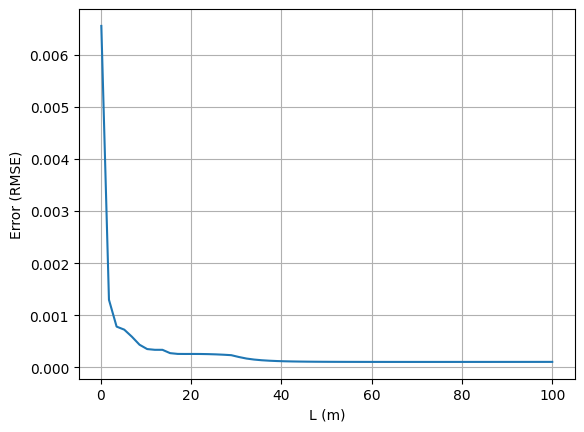

In [13]:
# Crear un arreglo de 60 valores equidistantes entre 0.1 y 100
L_val = np.linspace(0.1, 100, num=60)

# Calcular el error para cada valor de L
datos = np.zeros_like(L_val)
min_theta = 0.02662367

def pendulum(t, x, L):
    dx = np.zeros(len(x))
    dx[0] = x[1]
    dx[1] = -g/L*np.sin(x[0])
    return dx
for i, L_i in enumerate(L_val):
    # Solución lineal
    w_i = np.sqrt(g/L_i)
    theta_lin = min_theta*np.cos(w_i*t) + dtheta0/w_i*np.sin(w_i*t)
       # Solución no lineal
    sol = solve_ivp(pendulum, [0, t.max()], [min_theta, 0], args=(L_i,), t_eval=t)
    theta_nonlin = sol.y[0]
    
    # Calcular el RMSE entre las dos soluciones
    diff_linear = theta_lin - theta_nonlin
    diff_sq_linear = diff_linear**2
    mse_linear = np.mean(diff_sq_linear)
    rmse_linear = np.sqrt(mse_linear)
    datos[i] = (rmse_linear*180)/np.pi
    

# Graficar el error en función de L para ambas soluciones
plt.plot(L_val, datos )
plt.xlabel("L (m)")
plt.ylabel("Error (RMSE)")
plt.grid()
plt.show()



### 7. Análisis y discusión general de resultados

En primera instancia, pudimos apreciar la diferencia entre los resultados de ambas ecuaciones para un péndulo simple, la ecuación no lineal, y la aproximación lineal, la cual es más precisa para amplitudes pequeñas, esto esto queda demostrado e ilustrado en el punto 2 por medio de un calculo de error cuadrático medio.

Luego, con el procedimiento del punto 6, podemos ver con más claridad las diferencias entre ambas formulas, y reforzar la idea de que mientras menor sea el ángulo theta, menor será la diferencia entre ambos resultados, así mismo, aumentar la longitud de la cuerda también disminuirá el error. A medida que se aumenta la longitud de la cuerda, la amplitud de la oscilación disminuye, lo que significa que el péndulo se mueve en un rango más pequeño, esto hace que la ecuación lineal se aproxime más a la ecuación no lineal para amplitudes pequeñas, lo que significa que los resultados de ambas ecuaciones serán más similares.

--------------------------------------------------------------------------------------------------------

##  Evaluación

Se calculara una nota para la presentación y otra para el desarrollo del cuadernillo, en base a la siguiente fórmula con exigencia al 60%:


\begin{equation*}  
n = 
     \begin{cases}
       (n_{apr}-n_{min}) \cdot \dfrac{p}{e \cdot p_{max}} + n_{min} \quad \text{si} \quad p < e \cdot p_{max}\\ \\
       (n_{max}-n_{apr}) \cdot \dfrac{p - e \cdot p_{max}}{p_{max} \cdot (1-e)} + n_{apr} \quad \text{si} \quad p \geq e \cdot p_{max} \\
     \end{cases}
\end{equation*}


donde: <br><br>
$n_{apr} = 4: \quad \text{nota de aprobación} \\ $ 
$n_{max} = 7: \quad \text{nota máxima} \\$ 
$n_{min} = 1: \quad \text{nota mínima} \\$
$e = 0.6: \quad \text{exigencia}\\$
$p_{max}: \quad \text{puntaje máximo}\\$
$p: \quad \text{puntaje obtenido}$

Con esto, se obtiene ambas notas en base a los puntos evaluados:

\begin{equation*}
N_{presentación} = n(\left[Calidad(2) + Dominio(3) + Coordinación (1) + Respuesta(2)\right])
\end{equation*}

\begin{equation*}
N_{notebook} = n(\left[Pregunta 1(2) + Pregunta 2(2)  + Pregunta 3(3)  + Pregunta 4(1) + Pregunta 5(3) +P regunta 6(1) + Pregunta 7(3) \right])
\end{equation*}

Se calcula la **nota final** como:

\begin{equation*}
N_{final} = \left(0.6 \cdot N_{notebook}+0.4 \cdot N_{presentación}\right)
\end{equation*}





### Presentación

- Calidad de la presentación: Los estudiantes fueron claros al exponer... etc
    - Puntaje máximo: 2
    - Puntaje obtenido: 1.5 
<br><br>
- Dominio del tema: 

    - Puntaje máximo: 3
    - Puntaje obtenido: 3
<br><br>
- Coordinación grupal

    - Puntaje máximo: 1
    - Puntaje obtenido: 0.8
<br><br>
- Respuestas

    - Puntaje máximo: 2
    - Puntaje obtenido: 2

### Desarrollo enunciado

- Pregunta 1

    - Puntaje máximo: 2
    - Puntaje obtenido: 1.8
<br><br>
- Pregunta 2

    - Puntaje máximo: 2
    - Puntaje obtenido: 1.5
<br><br>
- Pregunta 3

    - Puntaje máximo: 3
    - Puntaje obtenido: 3
<br><br>
- Pregunta 4

    - Puntaje máximo: 1
    - Puntaje obtenido: 1
<br><br>
- Pregunta 5

    - Puntaje máximo: 3
    - Puntaje obtenido: 2.8
<br><br>
- Pregunta 6

    - Puntaje máximo: 1
    - Puntaje obtenido: 1
<br><br>
- Pregunta 7

    - Puntaje máximo: 3
    - Puntaje obtenido: 3

In [2]:
def nota_puntaje(p,pmax,e):
    if p >= e*pmax:
        n = (7-4)*((p-e*pmax)/(pmax*(1-e)))+4
    if p < e*pmax:
        n = (4-1)*(p/(e*pmax))+1
    return round(n,2)

def nota_final(n_notebook,n_presentacion):
    nf = 0.6*n_notebook+0.4*n_presentacion
    return round(nf,2)

In [3]:
p_notebook = 1.8+1.5+3.0+1.0+2.8+1.0+3.0
p_presentacion = 1.5+3.0+0.8+2
pmax_notebook = 15
pmax_presentacion = 8
exigencia = 0.6

nota_notebook = nota_puntaje(p_notebook,pmax_notebook,exigencia)
nota_presentacion = nota_puntaje(p_presentacion,pmax_presentacion,exigencia)

nf = nota_final(nota_notebook,nota_presentacion)
print("La nota final es: ",nf)

La nota final es:  6.47


## Observaciones y comentarios

Como sugerencia explorar la librería de gráficos (matplotlib) para mejorar la calidad y entendimiento de las figuras. Ejemplo: incluir títulos, cambiar tamaños, leyendas, etc. 
Explicar el contexto de los errores RMSE (pregunta 3), en qué magnitud se encuentran. Buen análisis, pero puede mejorar la redacción.